In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

from cricket_helper_functions import get_innings_dataframe, insert_player_link, create_csv, parse_not_out, get_career_average_list

In [3]:
data = pd.read_csv("Initial_data.csv")

In [4]:
data

,ID,Batter,M,I,R,Avg
0,25,Tendulkar,463,452,18426,44.83
1,1413,Kohli,274,265,12898,57.32
2,29,S Ganguly,308,297,11221,40.95
3,27,Dravid,340,314,10768,39.16
4,265,Dhoni,347,294,10599,50.23
5,576,Rohit,243,236,9825,48.64
6,3864,M Azharuddin,334,308,9378,36.92
7,69,Yuvraj,301,275,8609,36.48
8,26,Sehwag,241,235,7995,35.38
9,1446,Dhawan,167,164,6793,44.11


## Is Sachin the Best Batsmen in Indian Cricket History

### 1. How does he fare against other Indian Batsmen?
* Comparing Runs
    - Look at total innings and then set the same innings for everyone
* Comparing Averages
    - Look at total innings and then set the same innings
    - Look at Averages over the course of a career
* Comparing Percentage of Runs
    - Look at how many runs were scored solely by Sachin versus the rest of the team
* Ratio of Centuries to Wins
    - How many of the 100 centuries came in wins
* Value of the runs
    - Factors to consider:
        - Percentage of Runs
        - Where the runs were scored
        - Whether the team won or not
        - Number of wickets that fell
        - More to add on this
* Can anyone come close....maybe one (Virat vs. Sachin)

#### 1.1 Comparing Runs

In [5]:
# Format the type of the columns
data[["M", "I", "R"]] = data[["M", "I", "R"]].astype(int)
data["Avg"] = data["Avg"].astype(float)

In [6]:
# Compare the number of runs scored by everyone in the top 10
top_10 = data.iloc[:10]
fig = px.pie(top_10, values = "R", names = "Batter", title="Top 10 Run Scorers in ODIs for India")
fig.show()


Text(0, 0.5, 'Runs')

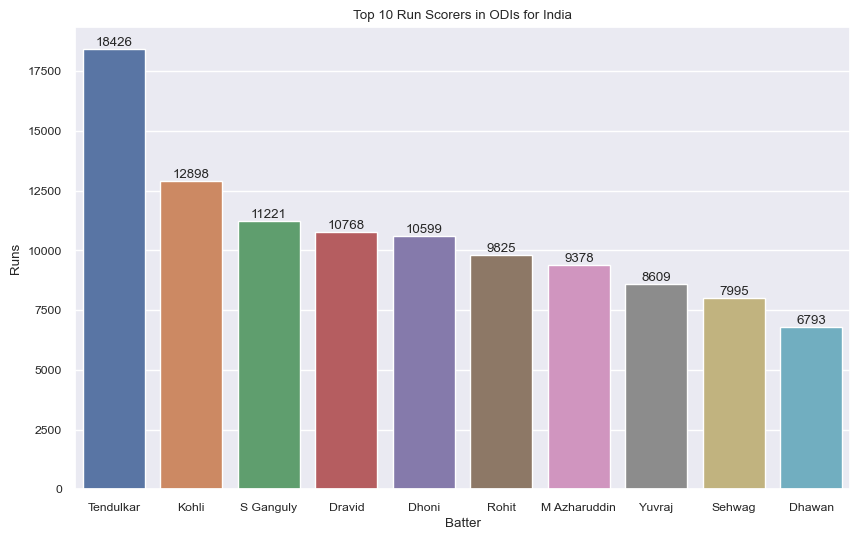

In [7]:
# Barplot comparing top 10 Runs Scorers
plt.figure(figsize=(10,6))
sns.set(font_scale = 0.8)
top_10_bar = sns.barplot(x = "Batter", y = "R", data=top_10)
for i in top_10_bar.containers:
    top_10_bar.bar_label(i,)
plt.title("Top 10 Run Scorers in ODIs for India")
plt.ylabel("Runs")

We can see that Tendulkar clearly has the most runs among anyone, however this could also be due to the fact that he batted in 452 innings, more than 100 innings greater than the next batsmen. In that case, we will even out the playing field and look at the runs that were scored in the first 200 innings.

In [8]:
# Look at runs after playing 200 innings
only_200 = data[data["I"] > 200]
only_200

,ID,Batter,M,I,R,Avg
0,25,Tendulkar,463,452,18426,44.83
1,1413,Kohli,274,265,12898,57.32
2,29,S Ganguly,308,297,11221,40.95
3,27,Dravid,340,314,10768,39.16
4,265,Dhoni,347,294,10599,50.23
5,576,Rohit,243,236,9825,48.64
6,3864,M Azharuddin,334,308,9378,36.92
7,69,Yuvraj,301,275,8609,36.48
8,26,Sehwag,241,235,7995,35.38


In [9]:
# Insert the names of the players in the top with 200 innings
insert_player_link("Sachin", "https://stats.espncricinfo.com/ci/engine/player/35320.html?class=2;template=results;type=batting;view=innings")
insert_player_link("Kohli", "https://stats.espncricinfo.com/ci/engine/player/253802.html?class=2;template=results;type=batting;view=innings")
insert_player_link("Ganguly", "https://stats.espncricinfo.com/ci/engine/player/28779.html?class=2;template=results;type=batting;view=innings")
insert_player_link("Dravid", "https://stats.espncricinfo.com/ci/engine/player/28114.html?class=2;template=results;type=batting;view=innings")
insert_player_link("Dhoni", "https://stats.espncricinfo.com/ci/engine/player/28081.html?class=2;template=results;type=batting;view=innings")
insert_player_link("Rohit", "https://stats.espncricinfo.com/ci/engine/player/34102.html?class=2;template=results;type=batting;view=innings")
insert_player_link("Azharuddin", "https://stats.espncricinfo.com/ci/engine/player/26329.html?class=2;template=results;type=batting;view=innings")
insert_player_link("Yuvraj", "https://stats.espncricinfo.com/ci/engine/player/36084.html?class=2;template=results;type=batting;view=innings")
insert_player_link("Sehwag", "https://stats.espncricinfo.com/ci/engine/player/35263.html?class=2;template=results;type=batting;view=innings")

Name is already in the data
Name is already in the data
Name is already in the data
Name is already in the data
Name is already in the data
Name is already in the data
Name is already in the data
Name is already in the data
Name is already in the data


In [10]:
# Reading in the csv of the players and the cricinfo links
links_df = pd.read_csv("player_links.csv")

In [11]:
links_df

,Name,URL
0,Sachin,https://stats.espncricinfo.com/ci/engine/playe...
1,Kohli,https://stats.espncricinfo.com/ci/engine/playe...
2,Ganguly,https://stats.espncricinfo.com/ci/engine/playe...
3,Dravid,https://stats.espncricinfo.com/ci/engine/playe...
4,Dhoni,https://stats.espncricinfo.com/ci/engine/playe...
5,Rohit,https://stats.espncricinfo.com/ci/engine/playe...
6,Azharuddin,https://stats.espncricinfo.com/ci/engine/playe...
7,Yuvraj,https://stats.espncricinfo.com/ci/engine/playe...
8,Sehwag,https://stats.espncricinfo.com/ci/engine/playe...


In [12]:
def get_combined_player_innings(data, num_innings=None):
    players = data["Name"].tolist()
    urls = data["URL"].tolist()


    combined_players_innings = pd.DataFrame(columns=["Name", "Runs", "Average", "Not Out", "Innings"])
    for name, url in zip(players, urls):
        df = get_innings_dataframe(url)
        if num_innings is not None:
            df = df.iloc[:num_innings]
        num_not_out = sum(df["Runs"].str.contains("\*"))
        df = parse_not_out(df)
        runs = df["Runs"].astype(int).tolist()
        total_runs = sum(runs)

        avg = total_runs/(len(runs) - num_not_out)
        new_row = {"Name": name, "Runs": total_runs, "Average": avg, "Not Out": num_not_out, "Innings": num_innings}
        combined_players_innings = pd.concat([combined_players_innings, pd.DataFrame([new_row])], ignore_index=True)
    
    return combined_players_innings

only_200_df = get_combined_player_innings(links_df, num_innings=200)


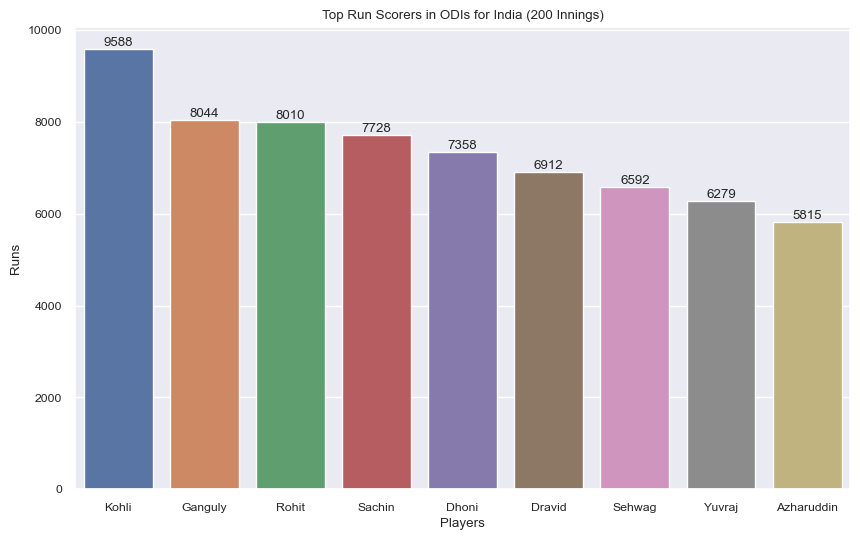

In [13]:
plt.figure(figsize=(10,6))
sns.set(font_scale = 0.8)
ax = sns.barplot(data=only_200_df, x = "Name", y = "Runs", order=only_200_df.sort_values(by="Runs", ascending=False).Name)
ax.set_xlabel("Players")
ax.set_title("Top Run Scorers in ODIs for India (200 Innings)")
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

As we can see, Sachin Tendulkar does not have the highest number of runs after 200 innings, he is in 4th place. We will see later that the averages will also suggest this.

There can be a few reasons why his number of runs is so low:
* Remember: his final tally after 452 innings (an additional 252 from this) is 18426, meaning that he increased his tally by more than 10000 runs over the next 252 innings, meaning that he improved a lot over time
* We can analyze his run tally in comparison to the time period in which he played. Was his tally considered great for its time? Were runs simply more difficult to get back then (Bat size, ground size, bowlers, etc.)?
* How do his runs/averages look like when he is opening and when he is not?

In [14]:
# Get the Runs and Average for Sachin Among his 200 Innings when he is openning vs. when he is not
sachin = get_innings_dataframe(links_df[links_df["Name"] == "Sachin"]["URL"][0])

# Filter out when sachin was opening versus when he was not
opening = parse_not_out(sachin[(sachin["Pos"] == "1") | (sachin["Pos"] == "2")])
not_opening = parse_not_out(sachin[(sachin["Pos"] != "1") & (sachin["Pos"] != "2")])
opening_runs = opening["Runs"].sum()
not_opening_runs = not_opening["Runs"].sum()

sachin_200 = sachin.iloc[:200]
opening = parse_not_out(sachin_200[(sachin_200["Pos"] == "1") | (sachin_200["Pos"] == "2")])
not_opening = parse_not_out(sachin_200[(sachin_200["Pos"] != "1") & (sachin_200["Pos"] != "2")])

opening_runs_200 = opening["Runs"].sum()
not_opening_runs_200 = not_opening["Runs"].sum()
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=["Opening", "Not Opening"], values=[opening_runs, not_opening_runs], name="Career Runs"), 1, 1)
fig.add_trace(go.Pie(labels=["Opening", "Not Opening"], values=[opening_runs_200, not_opening_runs_200], name="Runs After 200 Innings"), 1, 2)
fig.update_traces(hole = 0.4, hoverinfo='label+percent', textinfo='value', textfont_size=20)

fig.update_layout(
    title_text="Sachin Tendulkar Run Comparison as Opener",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Career', x=0.20, y=0.5, font_size=20, showarrow=False),
                 dict(text='Only 200', x=0.805, y=0.5, font_size=20, showarrow=False)])
fig.show()

#### 1.2 Comparing Averages

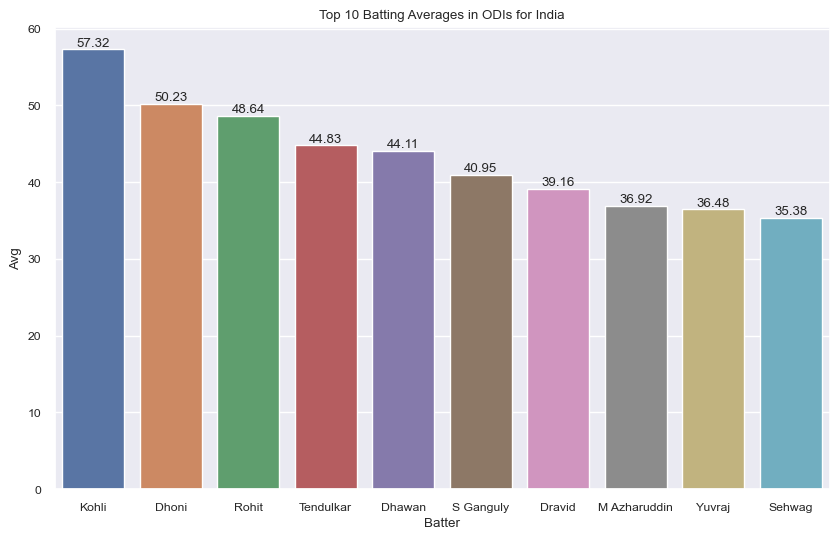

In [15]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=top_10, x = "Batter", y = "Avg", order=top_10.sort_values(by="Avg", ascending=False).Batter)
ax.set_title("Top 10 Batting Averages in ODIs for India")
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

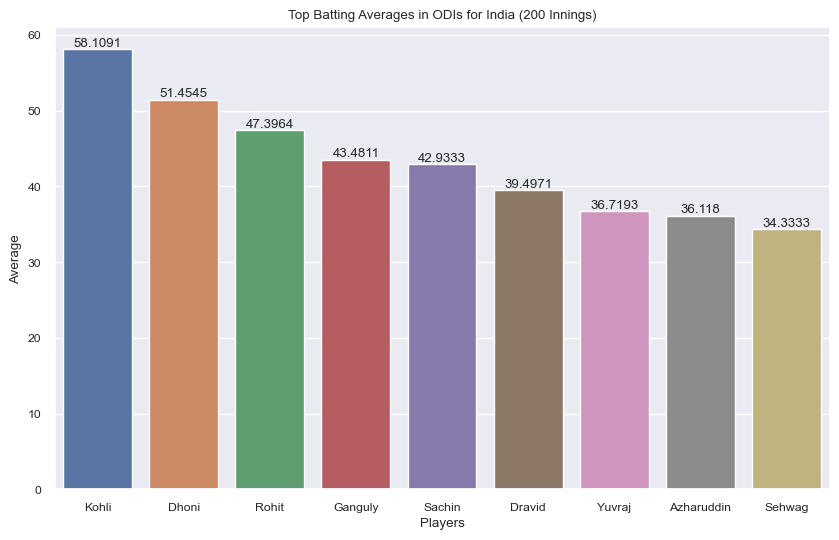

In [16]:
plt.figure(figsize=(10,6))
sns.set(font_scale = 0.8)
ax = sns.barplot(data=only_200_df, x = "Name", y = "Average", order=only_200_df.sort_values(by="Average", ascending=False).Name)
ax.set_xlabel("Players")
ax.set_title("Top Batting Averages in ODIs for India (200 Innings)")
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

From the Averages we can see that overall, Sachin ranks fourth on averages and fifth when looking at the first 200 innings. However, there are some interesting points to keep in mind:

* Tendulkar's average increased post-200 innings
* Tendulkar played another 252 innings, and increased the average slightly

Next. we will see how these averages breakdown when you factor in what position he played

In [17]:
only_200_df.sort_values(by="Average", ascending=False)

,Name,Runs,Average,Not Out,Innings
1,Kohli,9588,58.109091,35,200
4,Dhoni,7358,51.454545,57,200
5,Rohit,8010,47.396450,31,200
2,Ganguly,8044,43.481081,15,200
0,Sachin,7728,42.933333,20,200
3,Dravid,6912,39.497143,25,200
7,Yuvraj,6279,36.719298,29,200
6,Azharuddin,5815,36.118012,39,200
8,Sehwag,6592,34.333333,8,200


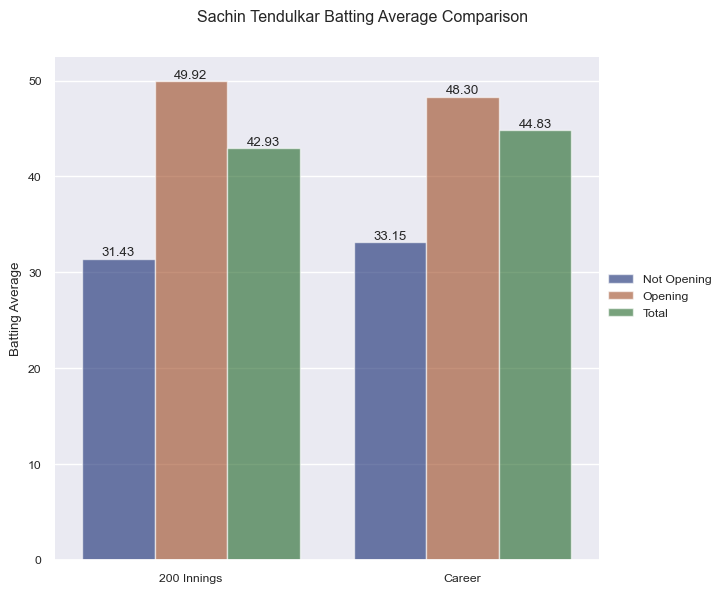

In [18]:
# Create bar plot comparing Tendulkar's Average as Opener versus when he is not 
# Two groups of three barplots (Not Opening Average, Opening Average, Total Average)
# First group is 200 Innings and the second is his career



# Career Stats
sachin_career = {}
sachin_career_opening_avg = get_career_average_list(sachin[(sachin["Pos"] == "1") | (sachin["Pos"] == "2")])
sachin_career_not_opening_avg = get_career_average_list(sachin[(sachin["Pos"] != "1") & (sachin["Pos"] != "2")])
sachin_career_avg = get_career_average_list(sachin)

# Only 200 Innings

sachin_200_opening_avg = get_career_average_list(sachin_200[(sachin_200["Pos"] == "1") | (sachin_200["Pos"] == "2")])
sachin_200_not_opening_avg = get_career_average_list(sachin_200[(sachin_200["Pos"] != "1") & (sachin_200["Pos"] != "2")])
sachin_200_avg = get_career_average_list(sachin_200)


sachin_averages_dict = {"Label" : ["200 Innings", "200 Innings", "200 Innings", "Career", "Career", "Career"],
                        "Averages" : [sachin_200_not_opening_avg[-1], sachin_200_opening_avg[-1], sachin_200_avg[-1], sachin_career_not_opening_avg[-1], sachin_career_opening_avg[-1], sachin_career_avg[-1]],
                        "Position": ["Not Opening", "Opening", "Total", "Not Opening", "Opening", "Total"]}

sachin_averages_df = pd.DataFrame.from_dict(sachin_averages_dict)

g = sns.catplot(data=sachin_averages_df, kind="bar", x = "Label", y = "Averages", hue="Position", palette="dark", alpha = 0.6, height=6)
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{v.get_height():.2f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
g.despine(left=True)
g.set_axis_labels("", "Batting Average")
g.legend.set_title("")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Sachin Tendulkar Batting Average Comparison")

# Create Pie Chat Differentiating Number of Innings Played by Position
num_innings_200 = [len(sachin_200_not_opening_avg), len(sachin_200_opening_avg)]
num_innings_career = [len(sachin_career_not_opening_avg), len(sachin_career_opening_avg)]
labels = ["Not Opening", "Opening"]

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=num_innings_career, name="Career Innings"), 1, 2)
fig.add_trace(go.Pie(labels=labels, values=num_innings_200, name="200 Innings"), 1, 1)
fig.update_traces(hole = 0.6, hoverinfo='label+percent', textinfo='value', textfont_size=20)

fig.update_layout(
    title_text="Breakdown of Tendulkar's Innings by Position",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='200 Innings', x=0.185, y=0.5, font_size=20, showarrow=False),
                 dict(text='Career', x=0.795, y=0.5, font_size=20, showarrow=False)])
fig.show()



Next would be to map the averages over the course of a career to get a view of the consistency of Tendulkar considering the number of innings he ended up playing

In [19]:
# Generate plot of everyone average over the course of their career
def generate_averages_plot(data):
    players = data["Name"].tolist()
    urls = data["URL"].tolist()

    fig = go.Figure()

    for player, url in zip(players, urls):
        df = get_innings_dataframe(url)
        averages = get_career_average_list(df)
        x = np.arange(1, len(averages)+1)
        fig.add_trace(go.Scatter(x=x, y=averages, name=player, mode="lines"))
    
    fig.update_layout(autosize=False,
                      width=1800,
                      height=1000,
                      title = "Batting Average Across Careers (Min: 200 Innings)",
                      xaxis_title = "Number of Innings",
                      yaxis_title = "Batting Average")
    fig.show()

        


In [20]:
# Get the plot of the career averages of the top players who have played at least 200 innings
generate_averages_plot(data=links_df)

The crucial aspect we see with Tendulkar is that his average is very steady even though he played over 450 innings. This shows a huge level of consistency across decades. Among those whose careers have finished, it would be difficult to tell how their averages would have compared to Tendulkar's as many different aspects have to be taken into account (Bowlers, Age, Fitness, Form, etc.)

In [21]:
# Get the plot of the averages over the course of a timeline (Timeline of Sachin's career and have others come in), which will extend beyond his career to incorporate active players
def generate_averages_timeline(data):
    players = data["Name"].tolist()
    urls = data["URL"].tolist()

    fig = go.Figure()
    
    for player, url in zip(players, urls):
        df = get_innings_dataframe(url)
        averages = get_career_average_list(df)
        fig.add_trace(go.Scatter(x=df["Start Date"], y = averages, name=player, mode="lines"))
        fig.update_layout(autosize=False,
                      width=1800,
                      height=1000,
                      title = "Batting Average Across Career Timeline (Min: 200 Innings)",
                      xaxis_title = "Date",
                      yaxis_title = "Batting Average")
    fig.show()

In [22]:
generate_averages_timeline(links_df)

Note: As of May 31, 2023 only Virat Kohli and Rohit Sharma are still actively playing ODI Cricket

In [23]:
# TODO: Add a vertical line to show Sachin's career

#### 1.3 Percentage of Runs 

In [27]:
example_url = "https://stats.espncricinfo.com/ci/engine/player/35320.html?class=2;template=results;type=batting;view=innings"
foo = get_innings_dataframe(example_url)
print(foo.iloc[0]["Match URL"])
foo_match = pd.read_html(foo.iloc[0]["Match URL"])[0]

https://stats.espncricinfo.com/ci/engine/match/64346.html


In [44]:
foo_match[foo_match["BATTING"] == "TOTAL"]["R"].iloc[0].split("/")

['87', '9']

In [31]:
foo_match

,BATTING,Unnamed: 1,R,B,M,4s,6s,SR,Unnamed: 8,Unnamed: 9
0,Mansoor Akhtar,run out,18,27,-,2,0,66.66,NaN,NaN
1,Ramiz Raja,c Sidhu b Maninder Singh,10,17,-,0,0,58.82,NaN,NaN
2,Saleem Malik,c Azharuddin b Maninder Singh,0,3,-,0,0,0.00,NaN,NaN
3,Wasim Akram,run out,2,3,-,0,0,66.66,NaN,NaN
4,Saeed Anwar,not out,42,32,-,4,2,131.25,NaN,NaN
5,Javed Miandad,run out,1,2,-,0,0,50.00,NaN,NaN
6,Imran Khan (c),c Srikkanth b Ankola,1,6,-,0,0,16.66,NaN,NaN
7,Abdul Qadir,lbw b Lamba,0,1,-,0,0,0.00,NaN,NaN
8,Zulqarnain †,c Prabhakar b Ankola,2,4,-,0,0,50.00,NaN,NaN
9,Waqar Younis,run out,3,3,-,0,0,100.00,NaN,NaN


In [64]:
def get_run_percentage(career_data):
    career_data = career_data.copy()
    career_data = parse_not_out(career_data)
    total_wickets = []
    total_scores = []
    percentages = []
    innings = career_data["Inns"].tolist()
    match_urls = career_data["Match URL"].tolist()
    runs_scored = career_data["Runs"].tolist()
    for inning, match_url, runs in zip(innings, match_urls, runs_scored):
        if inning == "1":
            scorecard = pd.read_html(match_url)[0]
        else:
            scorecard = pd.read_html(match_url)[2]
        final_score = scorecard[scorecard["BATTING"] == "TOTAL"]["R"].iloc[0].split("/")
        total_score = final_score[0]
        if len(final_score) == 1:
            total_wicket = "10"
        else:
            total_wicket = final_score[1]
        percentage = (int(runs)/int(total_score))*100
        # print(match_url, final_score, percentage)
        total_scores.append(int(total_score))
        total_wickets.append(int(total_wicket))
        percentages.append(percentage)

    career_data["Team Total"] = total_scores
    career_data["Wickets Fallen"] = total_wickets
    career_data["Percentage Scored"] = percentages

    return career_data


In [ ]:
# TODO: Fix the IncompleteRead Error (possibly use a try/except statement)

In [66]:
get_run_percentage(sachin)

IncompleteRead: IncompleteRead(3574 bytes read)